Definition of PV System parameters 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import pvlib 
from pvlib.modelchain import ModelChain
from pvlib.location import Location
from pvlib.pvsystem import PVSystem
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS


# Location = Fruticulture plot in Valpo 

location = Location (latitude = -32.76359193999683, longitude = -70.66545073954828, tz = 'Chile/Continental', altitude=100, name = 'Valpo_testplot-fruticulture')
print (location)


# 1. Define variable to access databases for modules and inverters

sandia_modules = pvlib.pvsystem.retrieve_sam ('SandiaMod')
CEC_inverters = pvlib.pvsystem.retrieve_sam ('CECInverter')

# 2. Define variable with choosen equipment

module_for_model = sandia_modules['Siemens_Solar_SP75__12V___2002__E__'] 
inverter_for_model = CEC_inverters ['ABB__MICRO_0_25_I_OUTD_US_208__208V_'] 

# 3. Define variable for temperature model 

temperature_parameters =TEMPERATURE_MODEL_PARAMETERS ['sapm'] ['open_rack_glass_glass'] 

# 4. Define system variable that includes all variables defined earlier 

system = PVSystem(surface_tilt=32, surface_azimuth=0,
                  inverter_parameters = inverter_for_model, module_parameters = module_for_model,
                  temperature_model_parameters=temperature_parameters)


# 5: Define variable modelchain that includes that key varoiables system and location 

modelchain = ModelChain (system, location)




Location: 
  name: Valpo_testplot-fruticulture
  latitude: -32.76359193999683
  longitude: -70.66545073954828
  altitude: 100
  tz: Chile/Continental


Define time series for irradiation data 

1. Clear sky model replaced by tmy import from from local directory based on csv file as a result of code "Tmy data processing" adapted as first trial


Text(0, 0.5, 'AC power generation (Watts)')

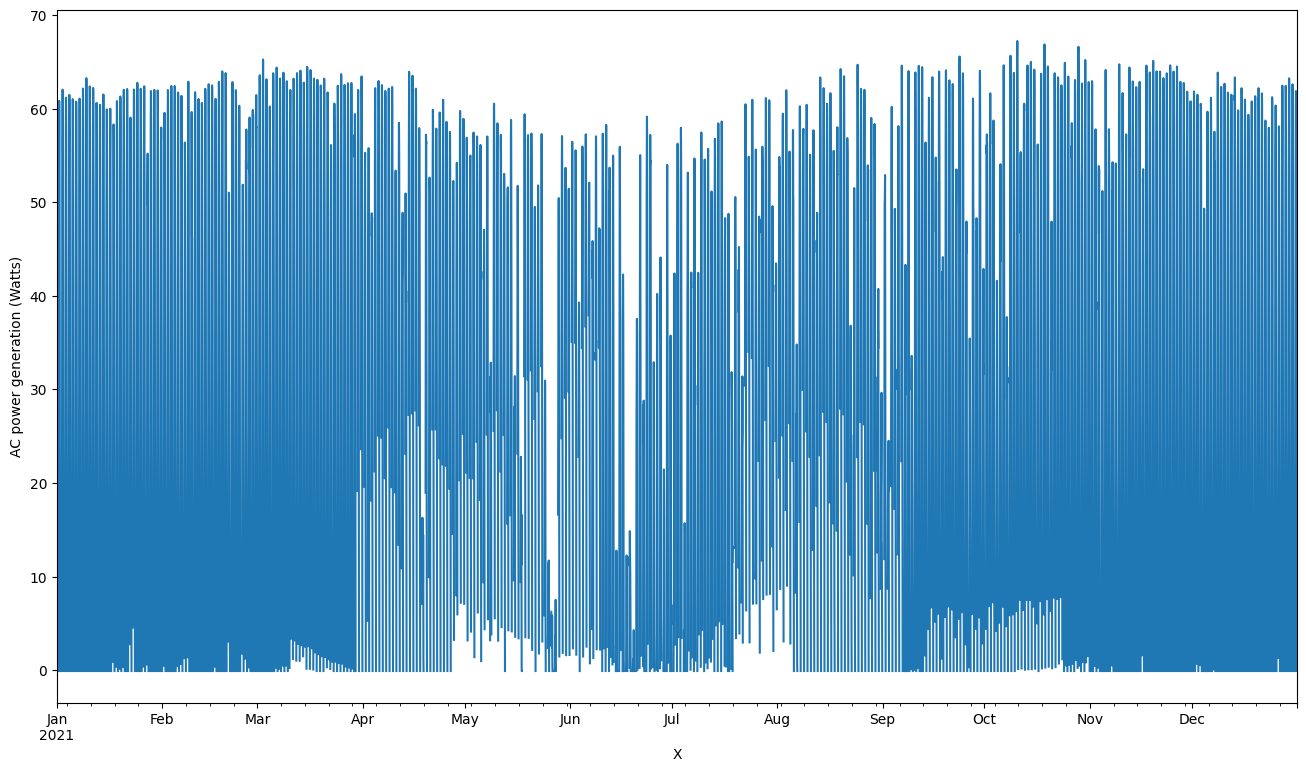

In [2]:
# 1: Define time series in pandas with start date, end date, data point freq and timezone (related to location power plant)


# times = pd.date_range(start = "01-01-23", end = "31-01-23",
#                     freq="60min", tz = location.tz)


# 2: Assign times variable to model that simulates irradiation per time stamp 

# clear_sky = location.get_clearsky (times)

# 3: Plot hourly solar irradiation 

# clear_sky.plot(figsize = (16,9))
# plt.xlabel("January 2023")
# plt.ylabel("Irradiation (Watts)")
# plt.show()

# 4: Run PV system yield model with input from clear_sky irradiation model 

tmy = pd.read_csv(r'C:\Users\frederik.schonberger\fraunhofer.cl\CSET-PV Integrated Photovoltaics - APV\06 Publicactions\2023 Ordenamiento terretorial Agro PV\Data\PVGIS\pvlib_tmy_test_data.csv')

tmy.index = pd.date_range(start="2021-01-01 00:00", end="2021-12-31 23:00", freq = "h" )
tmy.index = pd.to_datetime(tmy.index)


modelchain.run_model(tmy)

# 5: Plot results of PV yield simulation 

modelchain.results.ac.plot(figsize=(16,9)) 

plt.xlabel("X")
plt.ylabel("AC power generation (Watts)")



Define time series for irradiation data 

1. Clear sky model as the easiest solution implemented in the first exectution of the sim chain

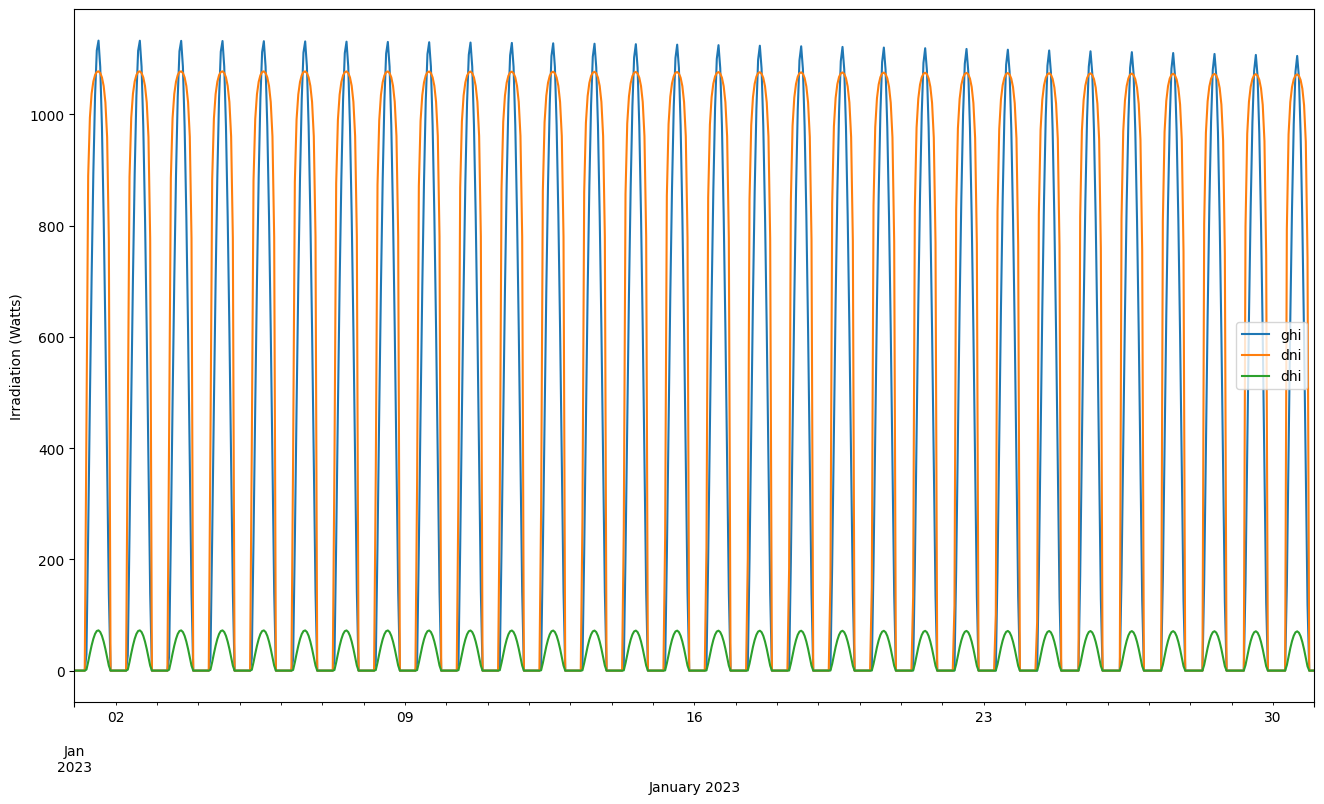

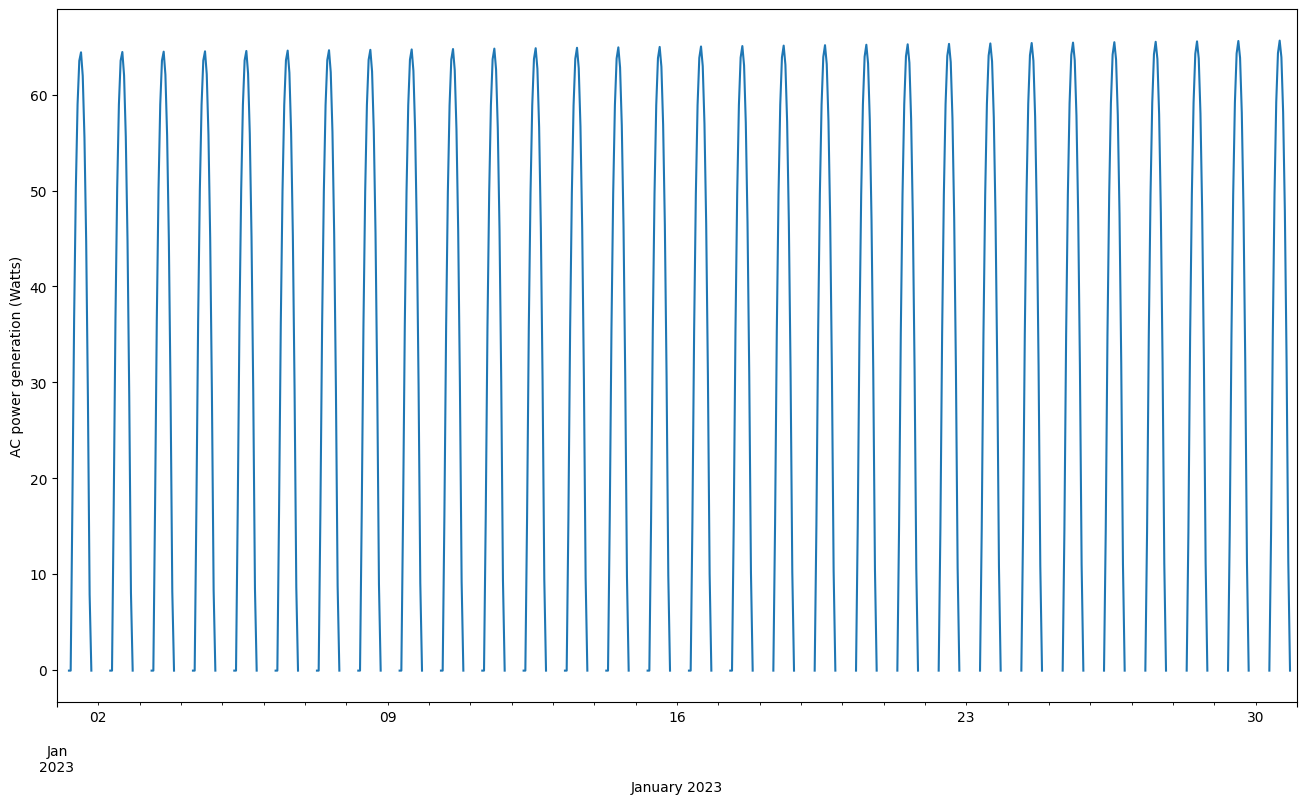

In [5]:
# 1: Define time series in pandas with start date, end date, data point freq and timezone (related to location power plant)


times = pd.date_range(start = "01-01-23", end = "31-01-23",
                      freq="60min", tz = location.tz)


# 2: Assign times variable to model that simulates irradiation per time stamp 

clear_sky = location.get_clearsky (times)

# 3: Plot hourly solar irradiation 

clear_sky.plot(figsize = (16,9))
plt.xlabel("January 2023")
plt.ylabel("Irradiation (Watts)")
plt.show()

# 4: Run PV system yield model with input from clear_sky irradiation model 

modelchain.run_model(clear_sky)

# 5: Plot results of PV yield simulation 

modelchain.results.ac.plot(figsize=(16,9)) 

plt.xlabel("January 2023")
plt.ylabel("AC power generation (Watts)")

import matplotlib.pyplot as plt


# Show the plot
plt.show()


